In [1]:
# MVD: test the changes made to CEO to allow the use of non integer DFT_osf values
import sys
import ceo
import numpy as np
import cupy as cp
import scipy
#import aotools
import matplotlib.pyplot as plt
import time
%matplotlib inline

0.004406382347421377


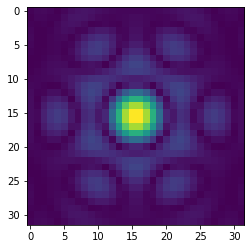

In [5]:
D = 25.5 # diameter of the pupil
NT = 128 # total number of pixels across the pupil
gmt = ceo.GMT_MX()
gmt.M2_baffle = 3.5
gmt.project_truss_onaxis = False

src = ceo.Source("K",zenith=[0.],azimuth=[0.],magnitude=[0.],rays_box_size=D,rays_box_sampling=NT+1,rays_origin=[0,0,25])
imgr = ceo.Imaging(N_SIDE_LENSLET=1,N_PX_PUPIL=NT,DFT_osf=4,N_SOURCE=1,N_PX_IMAGE=32)

~gmt
~src
~imgr
gmt.propagate(src)
imgr.propagate(src)

img = np.array(imgr.frame.host())
img /= np.sum(img)

plt.figure(1)
plt.clf()
plt.imshow(img**0.5)

print(imgr.pixelScaleArcsec(src))

0.005035865435224459


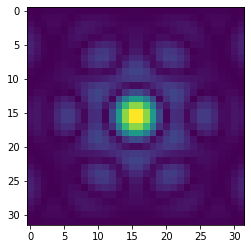

In [7]:
imgr2 = ceo.Imaging(N_SIDE_LENSLET=1,N_PX_PUPIL=NT,DFT_osf=3.5,N_SOURCE=1,N_PX_IMAGE=32)

~gmt
~src
~imgr2
gmt.propagate(src)
imgr2.propagate(src)

img2 = np.array(imgr2.frame.host())
img2 /= np.sum(img2)

plt.figure(2)
plt.clf()
plt.imshow(img2**0.5)

print(imgr2.pixelScaleArcsec(src))

In [8]:
0.004406382347421377*4/3.5

0.005035865539910145